# Logistic Regression

### Get Data

In [1]:
library(caTools)
library(pROC)
library(glmnet)

adult <- read.csv(file = "adult.csv", stringsAsFactors = FALSE)
dim(adult)

Warning message:
"package 'caTools' was built under R version 3.6.3"Warning message:
"package 'pROC' was built under R version 3.6.3"Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Warning message:
"package 'glmnet' was built under R version 3.6.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.3"Loaded glmnet 4.1-1


[1] 48842    15

In [2]:
head(adult)

age,workclass,fnlwgt,education,educational.num,marital.status,occupation,relationship,race,gender,capital.gain,capital.loss,hours.per.week,native.country,income
25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


### Data Exploration/Transformation

In [3]:
# convert ? to NA values
adult[adult == "?"] <- NA
# remove NA values
adult1 <- adult[complete.cases(adult),]

# remove education, fnlwgt, capital.gain, and capital.loss
adult2 <- subset(adult1, select = -c(education, fnlwgt, capital.gain, capital.loss))

#convert target variable to 1 if >50K and 0 if <=50K
adult2["income"][adult2["income"] == ">50K"] <- 1
adult2["income"][adult2["income"] == "<=50K"] <- 0
adult2$income <- as.numeric(adult2$income)

In [4]:
head(adult2)

,age,workclass,educational.num,marital.status,occupation,relationship,race,gender,hours.per.week,native.country,income
1,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,0
2,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,0
3,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,1
4,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,1
6,34,Private,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,0
8,63,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,32,United-States,1


In [5]:
# Ordinal encoding of categorical variables

encode_ordinal <- function(x, order = unique(x)) {
  x <- as.numeric(factor(x, levels = order, exclude = NULL))
  x
}

adult2[["workclass"]] <- encode_ordinal(adult2[["workclass"]])
adult2[["marital.status"]] <- encode_ordinal(adult2[["marital.status"]])
adult2[["occupation"]] <- encode_ordinal(adult2[["occupation"]])
adult2[["relationship"]] <- encode_ordinal(adult2[["relationship"]])
adult2[["race"]] <- encode_ordinal(adult2[["race"]])
adult2[["gender"]] <- encode_ordinal(adult2[["gender"]])
adult2[["native.country"]] <- encode_ordinal(adult2[["native.country"]])

In [6]:
head(adult2)

,age,workclass,educational.num,marital.status,occupation,relationship,race,gender,hours.per.week,native.country,income
1,25,1,7,1,1,1,1,1,40,1,0
2,38,1,9,2,2,2,2,1,50,1,0
3,28,2,12,2,3,2,2,1,40,1,1
4,44,1,10,2,1,2,1,1,40,1,1
6,34,1,6,1,4,3,2,1,30,1,0
8,63,3,15,2,5,2,2,1,32,1,1


### Build Model

In [7]:
# split dataset
split <- sample.split(adult2, SplitRatio = 0.8)
   
train <- subset(adult2, split == "TRUE")
test <- subset(adult2, split == "FALSE")

In [8]:
# fit the model
l_mod <- glm(income ~ ., data = train, family = "binomial")

summary(l_mod)


Call:
glm(formula = income ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9403  -0.6772  -0.4168  -0.0859   3.1947  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)     -7.018710   0.133954 -52.396  < 2e-16 ***
age              0.047956   0.001261  38.041  < 2e-16 ***
workclass        0.027577   0.010295   2.679 0.007390 ** 
educational.num  0.350998   0.006627  52.962  < 2e-16 ***
marital.status  -0.145218   0.012977 -11.191  < 2e-16 ***
occupation       0.033493   0.005030   6.659 2.75e-11 ***
relationship     0.064315   0.016953   3.794 0.000148 ***
race             0.051912   0.024151   2.149 0.031597 *  
gender          -1.145525   0.042854 -26.731  < 2e-16 ***
hours.per.week   0.034344   0.001298  26.462  < 2e-16 ***
native.country  -0.005018   0.003139  -1.599 0.109911    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial fami

In [9]:
coef(l_mod)

(Intercept)             age       workclass educational.num  marital.status 
   -7.018709631     0.047956201     0.027576656     0.350997538    -0.145218085 
     occupation    relationship            race          gender  hours.per.week 
    0.033492974     0.064315159     0.051912116    -1.145524916     0.034343708 
 native.country 
   -0.005018129

Therefore our fitted model is $\hat{\pi} = \hat{P}(y = 1|x) = \frac{1}{1 + e^{-z}}$, where $z = -7.02 + 0.05*age + 0.03*workclass + 0.35*educational.num - 0.15*marital.status + 0.03*occupation + 0.06*relationship + 0.05*race - 1.15*gender + 0.03*hours.per.week - 0.01*native.country$

### Predict On Test Data

In [10]:
predict <- predict(l_mod, test, type = "response")

### Evaluate Accuracy

In [11]:
# set threshold at s = 0.5 for yhat
predict <- ifelse(predict > 0.5, 1, 0)

# create confusion matrix
tbl = table(test$income, predict)
tbl

   predict
       0    1
  0 8692  597
  1 1875 1169

In [12]:
# accuracy
acc = (tbl[1,1] + tbl[2,2]) / sum(tbl)
acc

[1] 0.7995622

Since our NB model had an accuracy of $\approx 0.83$, the NB model is about $3\%$ better. However, either model is good as their accuracies are equal to or greater than $80\%$.

### ROC curve

Setting levels: control = FALSE, case = TRUE
Setting direction: controls < cases


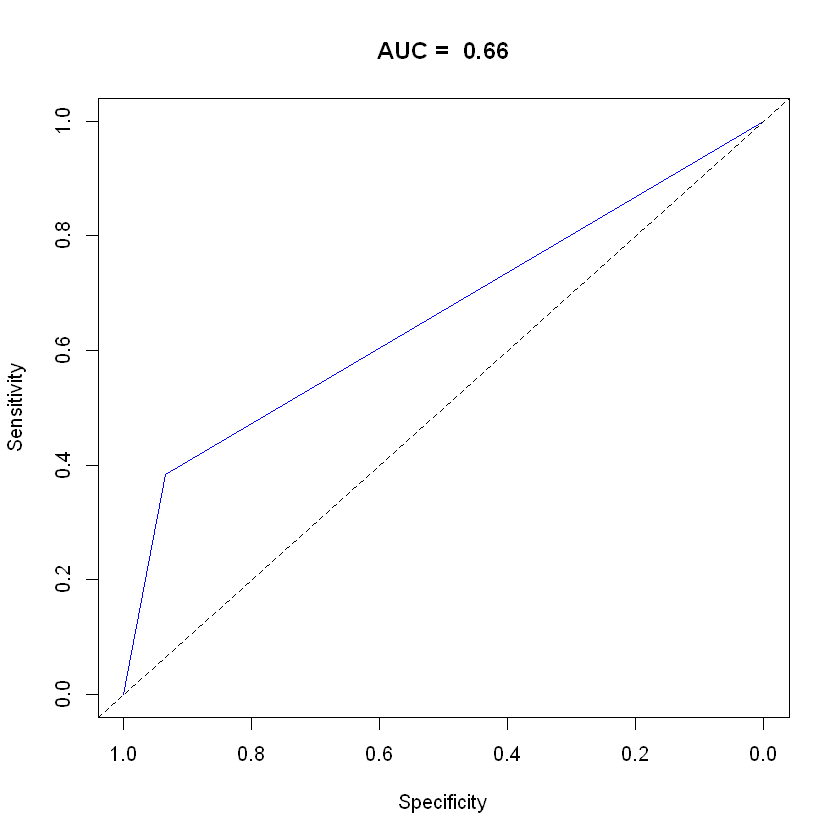

In [13]:
# build curve
y = (test$income == 1)

ROCcrv = roc(response = y, predictor = predict)
AUC = auc(ROCcrv)

#plot
plot(x = ROCcrv$specificities, y = ROCcrv$sensitivities, 
     main = paste("AUC = ", round(AUC,2)), xlab = "Specificity",
    ylab = "Sensitivity", xlim = c(1,0), type = "l", col = "blue")
abline(a = 1, b = -1, lty = "dashed")

### Ridge Regularization

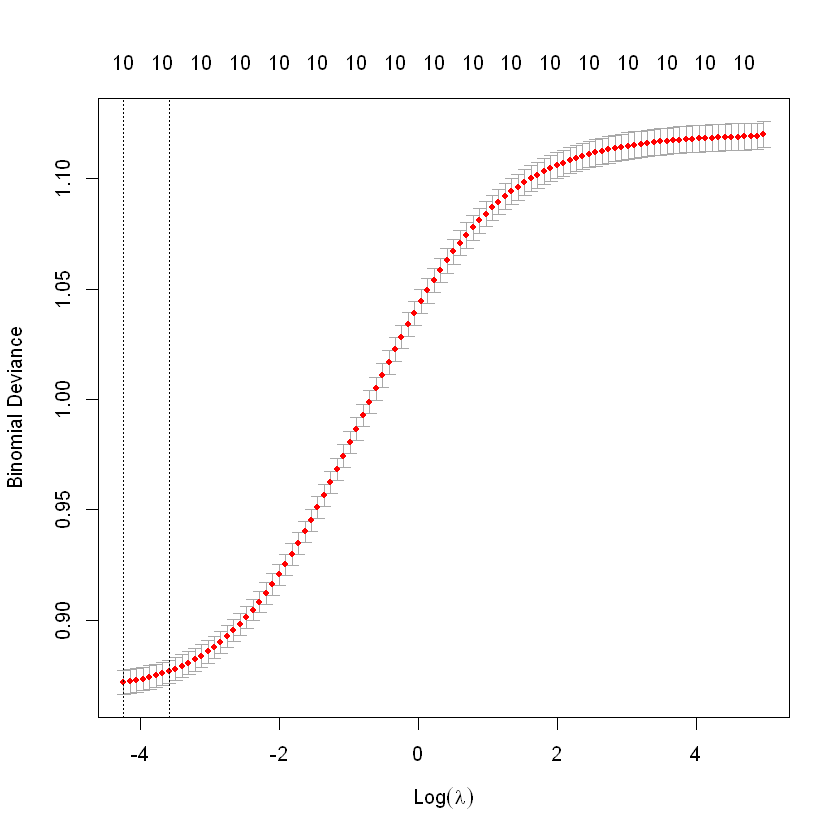

In [14]:
y = adult2$income
x = as.matrix(adult2[ , names(adult2) != "income"])

cvfit = cv.glmnet(x, y, family = "binomial", type.measure = "deviance",
                 nfolds = 10, alpha = 0)

plot(cvfit)

### Lasso Regularization

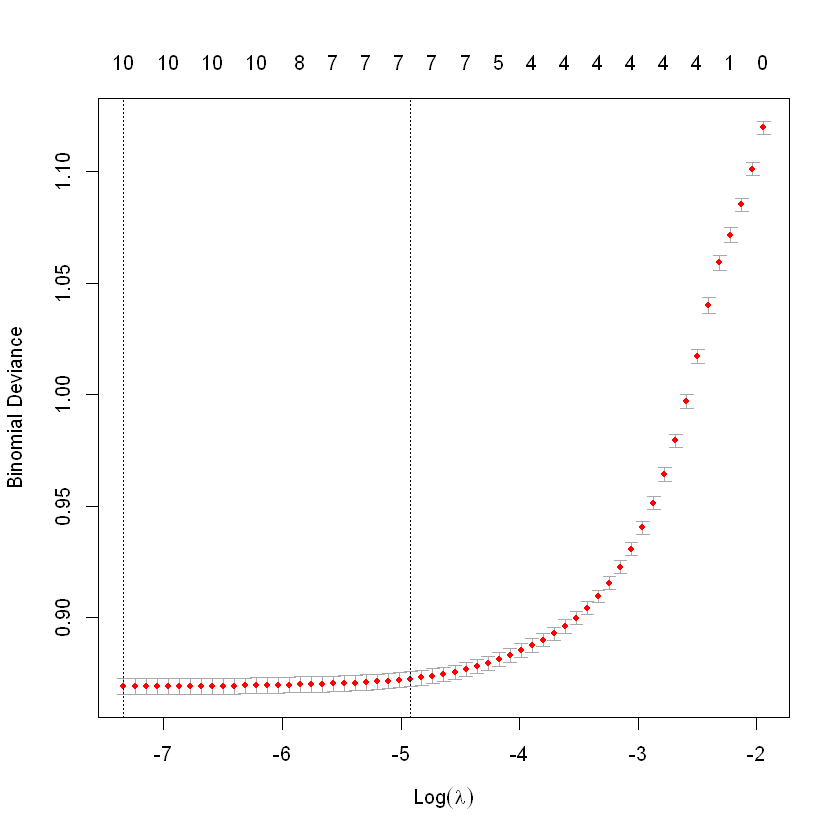

In [16]:
cvfit = cv.glmnet(x, y, family = "binomial", type.measure = "deviance",
                 nfolds = 10, alpha = 1)

plot(cvfit)

## Conclusion/Future Work

Both the NB model and logistic regression model proved to be capable of classifying adult income given theses specific predictors.  Another comparison could be done using a $k$NN model.

Additionally, I would like to know if the income variable could be broken down into smaller categories and even an exact numeric variable to try to use regression techniques to predict income.